In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('flights.csv')

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,5,16,6,UA,1511,N18220,PHX,ORD,1413,...,1929.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,4,7,2,AA,343,N3ALAA,LGA,ORD,1630,...,1908.0,48.0,0,0,NaN,14.0,0.0,0.0,34.0,0.0
2,2015,1,8,4,OO,2640,N988CA,ORD,ICT,835,...,1312.0,157.0,0,0,NaN,0.0,0.0,0.0,6.0,151.0
3,2015,5,5,2,OO,5219,N971SW,SBN,ORD,622,...,555.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,9,22,2,DL,134,N3736C,PHX,DTW,1003,...,1638.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5819 non-null   int64  
 1   MONTH                5819 non-null   int64  
 2   DAY                  5819 non-null   int64  
 3   DAY_OF_WEEK          5819 non-null   int64  
 4   AIRLINE              5819 non-null   object 
 5   FLIGHT_NUMBER        5819 non-null   int64  
 6   TAIL_NUMBER          5808 non-null   object 
 7   ORIGIN_AIRPORT       5819 non-null   object 
 8   DESTINATION_AIRPORT  5819 non-null   object 
 9   SCHEDULED_DEPARTURE  5819 non-null   int64  
 10  DEPARTURE_TIME       5740 non-null   float64
 11  DEPARTURE_DELAY      5740 non-null   float64
 12  TAXI_OUT             5739 non-null   float64
 13  WHEELS_OFF           5739 non-null   float64
 14  SCHEDULED_TIME       5819 non-null   int64  
 15  ELAPSED_TIME         5719 non-null   f

1/ this dataset has 5819 rows and 30 columns, it contains information about flights in and   out of the USA in a period of time we'll get to know later .

In [5]:
df.isna().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER              11
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME           79
DEPARTURE_DELAY          79
TAXI_OUT                 80
WHEELS_OFF               80
SCHEDULED_TIME            0
ELAPSED_TIME            100
AIR_TIME                100
DISTANCE                  0
WHEELS_ON                84
TAXI_IN                  84
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME             84
ARRIVAL_DELAY           100
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    5738
AIR_SYSTEM_DELAY       4727
SECURITY_DELAY         4727
AIRLINE_DELAY          4727
LATE_AIRCRAFT_DELAY    4727
WEATHER_DELAY          4727
dtype: int64

we have 11 airplane TAIL_NUMBER missing, and 79 flight departure_time and departure_delay ,this means that the plane never departed in other words the flight was canceled , we also have approxamatly the same number of NAs in (TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY) probably for the same reason but we'll know more when we analyze each variable on it's own , we have 4727 missing values in the delay reasons variables , this means that there was no delay on these flights , and 5738 missing values in the canncellation reason , this means that around 5738 flight weren't canceled 

# Uni variate analysis :

In [6]:
num_df = df.select_dtypes(exclude='object')
num_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819.0,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5740.000000,5740.000000,5739.000000,5739.000000,...,5819.000000,5735.000000,5719.000000,5819.000000,5819.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,2015.0,6.548720,15.833820,3.892250,2184.850318,1331.887094,1337.180488,9.505923,16.032758,1360.225301,...,1492.495274,1466.753095,4.439762,0.003265,0.013920,12.453297,0.178571,18.836996,23.408425,2.818681
std,0.0,3.428716,8.799047,1.982887,1769.546216,487.974084,501.053221,37.514894,8.971177,501.914943,...,509.141721,533.068694,39.724046,0.057053,0.117169,25.294319,3.634061,48.821801,47.692952,15.600304
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-23.000000,3.000000,1.000000,...,1.000000,1.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,733.500000,915.000000,921.000000,-5.000000,11.000000,937.000000,...,1106.500000,1052.500000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1711.000000,1330.000000,1336.000000,-1.000000,14.000000,1351.000000,...,1523.000000,1510.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,10.000000,23.000000,6.000000,3214.000000,1730.500000,1740.000000,8.000000,19.000000,1754.000000,...,1915.000000,1910.000000,8.000000,0.000000,0.000000,17.000000,0.000000,19.000000,32.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2357.000000,1043.000000,134.000000,2400.000000,...,2359.000000,2400.000000,1054.000000,1.000000,1.000000,381.000000,88.000000,801.000000,1033.000000,247.000000


In [7]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5819 non-null   int64  
 1   MONTH                5819 non-null   int64  
 2   DAY                  5819 non-null   int64  
 3   DAY_OF_WEEK          5819 non-null   int64  
 4   FLIGHT_NUMBER        5819 non-null   int64  
 5   SCHEDULED_DEPARTURE  5819 non-null   int64  
 6   DEPARTURE_TIME       5740 non-null   float64
 7   DEPARTURE_DELAY      5740 non-null   float64
 8   TAXI_OUT             5739 non-null   float64
 9   WHEELS_OFF           5739 non-null   float64
 10  SCHEDULED_TIME       5819 non-null   int64  
 11  ELAPSED_TIME         5719 non-null   float64
 12  AIR_TIME             5719 non-null   float64
 13  DISTANCE             5819 non-null   int64  
 14  WHEELS_ON            5735 non-null   float64
 15  TAXI_IN              5735 non-null   f

In [8]:
num_df['YEAR'].value_counts()
num_df['YEAR'].std()

0.0

this means that the variable year is insignificative in this data set it just iform us that these flights happend in the year of 2015 

In [9]:
num_df['DIVERTED'].value_counts()

DIVERTED
0    5800
1      19
Name: count, dtype: int64

In [10]:
num_df['CANCELLED'].value_counts()

CANCELLED
0    5738
1      81
Name: count, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_16024\1327968621.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No', 'Yes'])
C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_16024\1327968621.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No', 'Yes'])


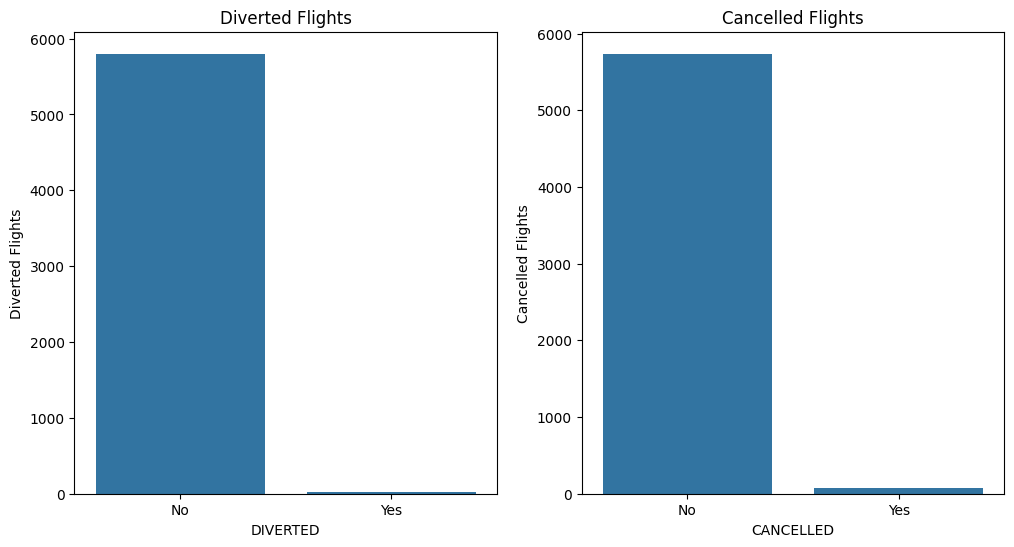

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='DIVERTED', ax=ax[0])
sns.countplot(data=df, x='CANCELLED', ax=ax[1])
ax[0].set_title('Diverted Flights')
ax[1].set_title('Cancelled Flights')
ax[0].set_xticklabels(['No', 'Yes'])
ax[1].set_xticklabels(['No', 'Yes'])
ax[0].set_ylabel('Diverted Flights')
ax[1].set_ylabel('Cancelled Flights')
plt.show()

this means that the diverted variable is considerd a categorical variable that explains whether the plane deviated to another airport (1) or not (0).
the same can be said about the cancelled variable .

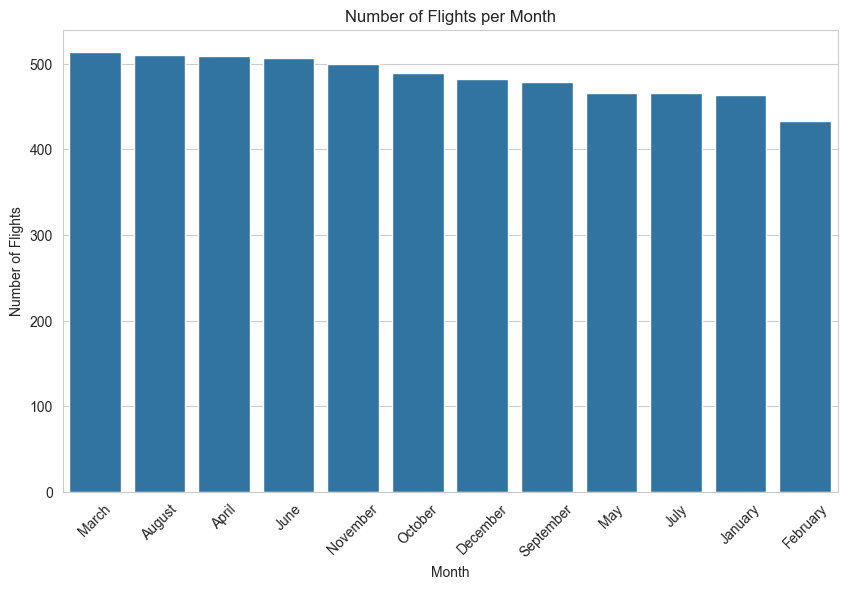

In [27]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
num_df["MONTH"].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)
sns.set_style('whitegrid')
sns.barplot(x=num_df['MONTH'].value_counts().index, y=num_df['MONTH'].value_counts().values)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.show()

In [44]:
num_df['MONTH'].value_counts().sort_values(ascending=False)

MONTH
3     514
8     510
4     509
6     507
11    500
10    489
12    482
9     479
5     466
7     466
1     464
2     433
Name: count, dtype: int64

this also means that the month variable is categorical and not numerical , representing months from Jan to Dec , and as we can see from this plot there's a similiar number of flights for each month , but the max number of flights was on march(514 FLIGHTS) and the minimum number of flights was on feburary( 433 FLIGHTS ).

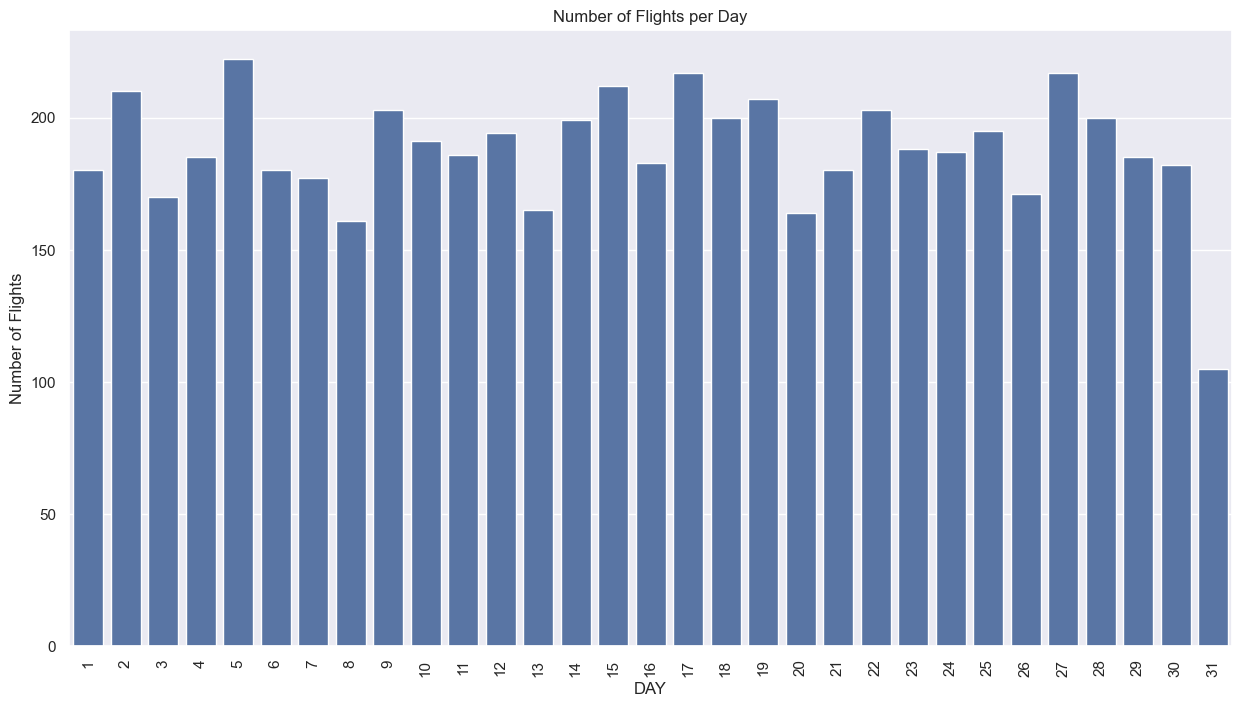

In [50]:
num_df['DAY'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=num_df['DAY'].value_counts().index, y=num_df['DAY'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Day')
plt.show()

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_16024\1906414030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_df['MONTH_TRIM'].value_counts().index, y=num_df['MONTH_TRIM'].value_counts().values, palette='viridis')


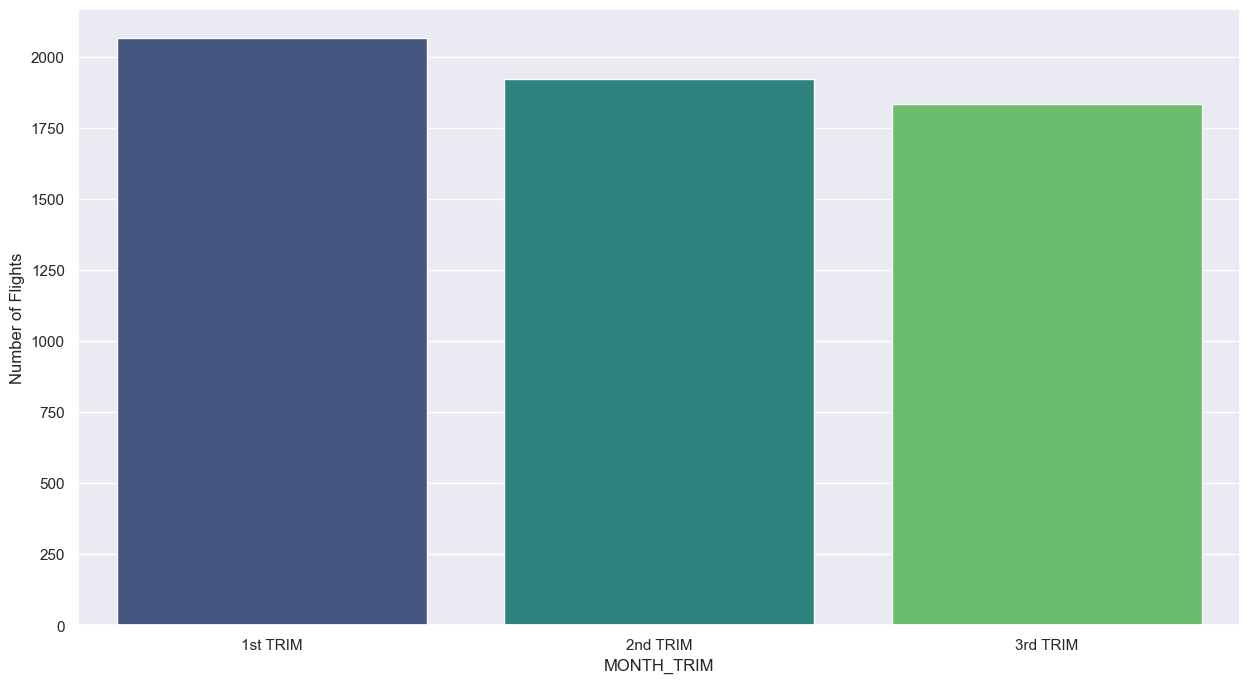

In [36]:
num_df['MONTH_TRIM']= pd.qcut(num_df['DAY'], q=3, labels=['1st TRIM', '2nd TRIM', '3rd TRIM'])
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=num_df['MONTH_TRIM'].value_counts().index, y=num_df['MONTH_TRIM'].value_counts().values, palette='viridis')
plt.ylabel('Number of Flights')
plt.show()

again the DAY  variable can be considered as categorical variable , since it represent the days of the month from 1 to 31 , and as we notice the max number of flight is on day 5 with 222 flights and the minimum is on the last day of the month with 105 flights ,and we can say that most flights are done at the begining of the month 

In [53]:
num_df['DAY_OF_WEEK'].value_counts().sort_values(ascending=False)

DAY_OF_WEEK
2    893
4    881
3    868
1    859
5    830
7    798
6    690
Name: count, dtype: int64

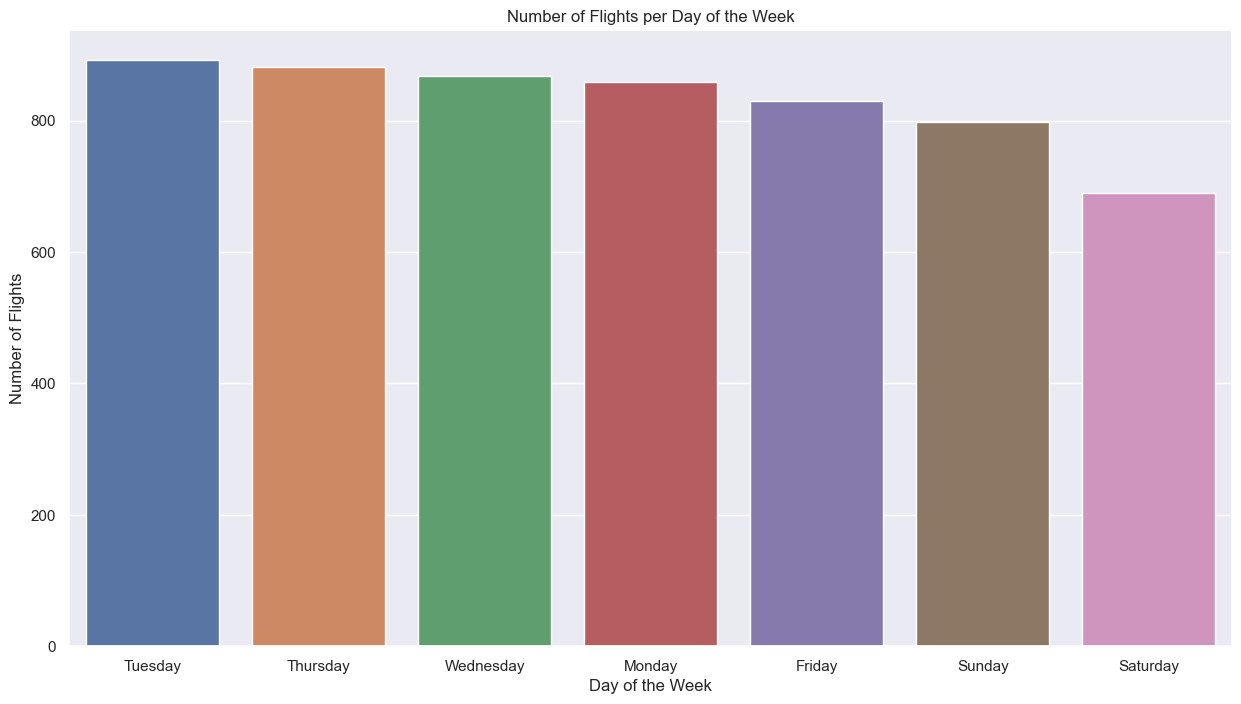

In [33]:
sns.set(rc={'figure.figsize':(15,8)})   
num_df['DAY_OF_WEEK'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}, inplace=True)
sns.barplot(x=num_df['DAY_OF_WEEK'].value_counts().index, y=num_df['DAY_OF_WEEK'].value_counts().values, hue=num_df['DAY_OF_WEEK'].value_counts().index)
plt.ylabel('Number of Flights')
plt.xlabel('Day of the Week')
plt.title('Number of Flights per Day of the Week')
plt.show()